In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ADITYA\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['M&M.NS','SBIN.NS','ICICIBANK.NS','ULTRACEMCO.NS','ITC.NS','INFY.NS','WIPRO.NS','NESTLEIND.NS','LT.NS','VEDL.NS','IOC.NS','DRREDDY.NS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [13]:
pf1=pf_data.drop(['NESTLEIND.NS'],inplace=False,axis=1)

In [14]:
pf1

,M&M.NS,SBIN.NS,ICICIBANK.NS,ULTRACEMCO.NS,ITC.NS,INFY.NS,WIPRO.NS,LT.NS,VEDL.NS,IOC.NS,DRREDDY.NS
Date,,,,,,,,,,,
2010-01-04,226.646637,95.066895,85.319977,929.778442,65.326035,129.378204,107.914261,607.630798,279.402100,26.569504,1047.040039
2010-01-05,230.819916,95.102180,86.130264,949.026489,65.969872,129.811600,109.617630,608.709229,281.461243,26.670839,1079.400391
2010-01-06,236.355637,95.672699,86.789574,950.181396,66.124397,127.917488,107.401352,601.972656,278.456909,26.632839,1107.085571
2010-01-07,231.852585,95.137444,85.970222,941.567871,65.918411,125.042534,105.495438,599.081421,275.317535,26.214857,1089.942627
2010-01-08,231.872665,94.853218,84.762535,953.068604,66.060043,122.029282,103.908943,602.870728,272.887115,26.662392,1094.663696
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,274.399994,186.899994,313.399994,3085.899902,159.199997,626.700012,184.149994,798.650024,61.549999,76.800003,2994.250000
2020-03-31,284.950012,196.850006,323.750000,3244.850098,171.699997,641.500000,196.699997,808.500000,64.699997,81.650002,3120.750000
2020-04-01,272.850006,186.550003,311.149994,3140.649902,166.399994,602.799988,189.500000,774.349976,62.650002,78.949997,3095.000000


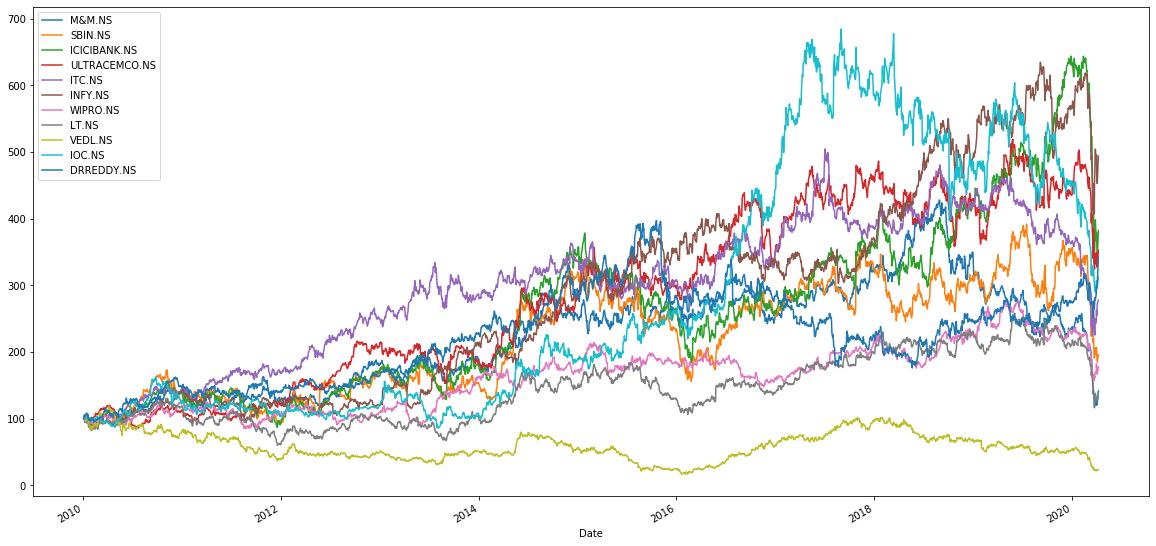

In [15]:
(pf1/pf1.iloc[0] *100).plot(figsize=(20,10))
plt.savefig('stocks1.jpg')

In [16]:
pf2=pf_data[['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS']]

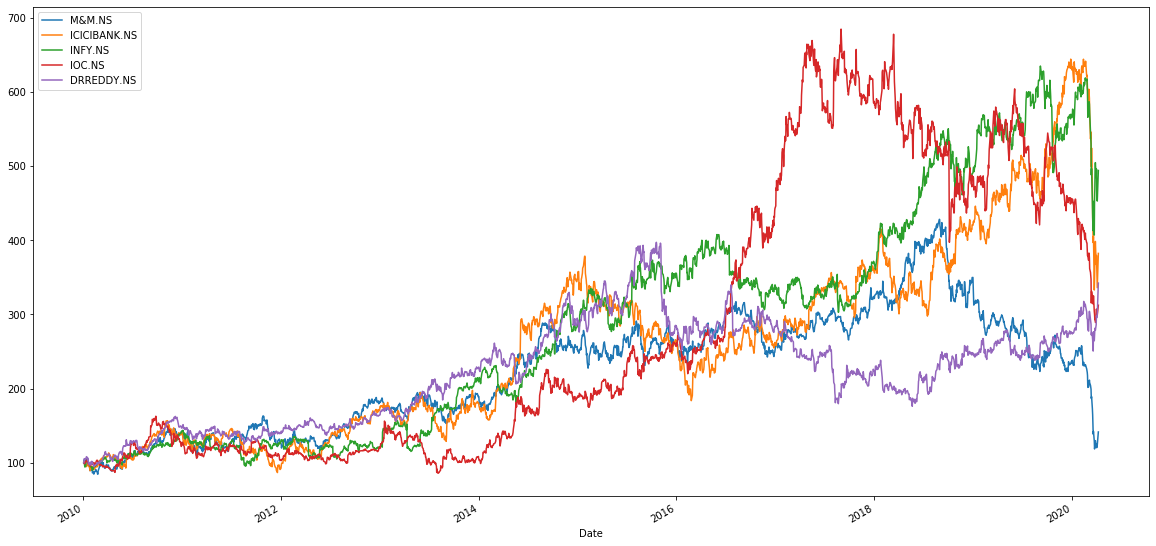

In [18]:
(pf2/pf2.iloc[0]*100).plot(figsize=(20,10))

In [19]:
log_return=np.log(pf2/pf2.shift(1))

In [20]:
log_return.mean()*250

M&M.NS          0.034447
ICICIBANK.NS    0.132699
INFY.NS         0.158072
IOC.NS          0.112735
DRREDDY.NS      0.121763
dtype: float64

In [24]:
log_return.cov()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,0.000344,0.000166,0.000062,0.000091,0.000063
ICICIBANK.NS,0.000166,0.000453,0.000091,0.000124,0.000073
INFY.NS,0.000062,0.000091,0.000328,0.000020,0.000051
IOC.NS,0.000091,0.000124,0.000020,0.000425,0.000034
DRREDDY.NS,0.000063,0.000073,0.000051,0.000034,0.000283


In [23]:
log_return.corr()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,1.000000,0.420807,0.184233,0.237496,0.202547
ICICIBANK.NS,0.420807,1.000000,0.235789,0.283503,0.202662
INFY.NS,0.184233,0.235789,1.000000,0.052677,0.166838
IOC.NS,0.237496,0.283503,0.052677,1.000000,0.097216
DRREDDY.NS,0.202547,0.202662,0.166838,0.097216,1.000000


In [25]:
# Expected Retruns

#Calculating the weights first

num=5 # number of shares in consideration
weights = np.random.random(num)
weights /= np.sum(weights)
weights

#returns

np.sum(weights * log_return.mean())*250

0.09686834846522012

In [26]:
# Portfolio Variance

#Code found on the internet xD

np.dot(weights.T, np.dot(log_return.cov() * 250, weights))  #250 i think is the number of working days in an year

0.037883719191405256

In [28]:
#Portfolio Volatility

np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights)))

0.194637404399579

In [66]:
pfolio_returns = []
pfolio_volatilities = []
sharpe = []
risk_free_r=0.0647
weightage=[]
for x in range (10000):
    weights = np.random.random(num)
    weights /= np.sum(weights)
    weightage.append(weights)
    pfolio_returns.append(np.sum(weights * log_return.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov() * 250, weights))))
    temp=((pfolio_returns[x]-risk_free_r)/pfolio_volatilities[x])
    sharpe.append(temp)
    
    
pfolio_returns = np.array(pfolio_returns)  #Converrting list to numpy array.
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe)

pfolio_returns, pfolio_volatilities, sharpe_ratio # Each array has 10000 values.

(array([0.0976793 , 0.1289365 , 0.12637267, ..., 0.10059299, 0.12165459,
        0.12082525]),
 array([0.20558203, 0.19881991, 0.20261035, ..., 0.18385463, 0.21779809,
        0.20114743]),
 array([0.16041915, 0.32308886, 0.30439054, ..., 0.19522486, 0.2615018 ,
        0.27902545]))

In [67]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

The weightages for each stock cosnidering Maximum sharpe ratio:


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.000366      0.087763  0.467335  0.095028    0.349508


Text(0, 0.5, 'Expected Return')

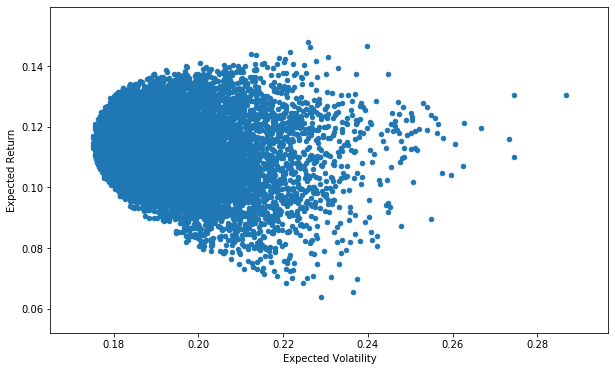

In [68]:
final_pf=pd.DataFrame(weightage[np.argmax(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])

print('The weightages for each stock cosnidering Maximum sharpe ratio:\n\n\n',final_pf.T)

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')